In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape,test.shape

((891, 12), (418, 11))

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
## Data Visualisation

## Data Visualisation

FeMale:  74.20382165605095
Male:  18.890814558058924


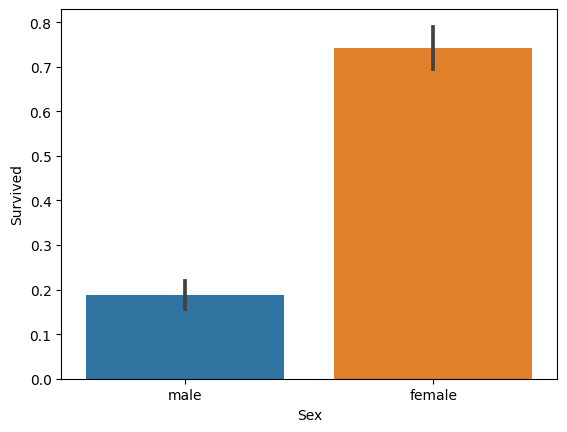

In [11]:
sns.barplot(x='Sex', y='Survived', data=train)
print('FeMale: ',train['Survived'][train['Sex']=='female'].value_counts(normalize= True)[1]*100)
print('Male: ',train['Survived'][train['Sex']=='male'].value_counts(normalize= True)[1]*100)

In [ ]:
# Pclass

Pclass = 1  62.96296296296296
Pclass = 2  47.28260869565217
Pclass = 3  24.236252545824847


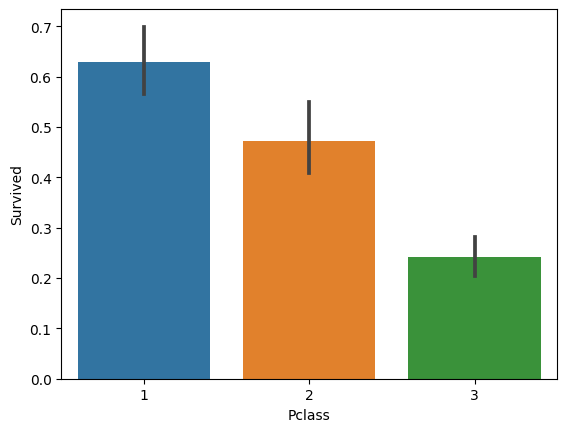

In [13]:
sns.barplot(x='Pclass', y='Survived', data= train)
print('Pclass = 1 ',train['Survived'][train['Pclass']==1].value_counts(normalize=True)[1]*100)
print('Pclass = 2 ',train['Survived'][train['Pclass']==2].value_counts(normalize=True)[1]*100)
print('Pclass = 3 ',train['Survived'][train['Pclass']==3].value_counts(normalize=True)[1]*100)

In [14]:
train.Age= train.Age.fillna(-0.5)
test.Age= test.Age.fillna(-0.5)

In [15]:
bins = [-1,0,4,12,18,24,35,60,np.inf]

labels=['Uknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


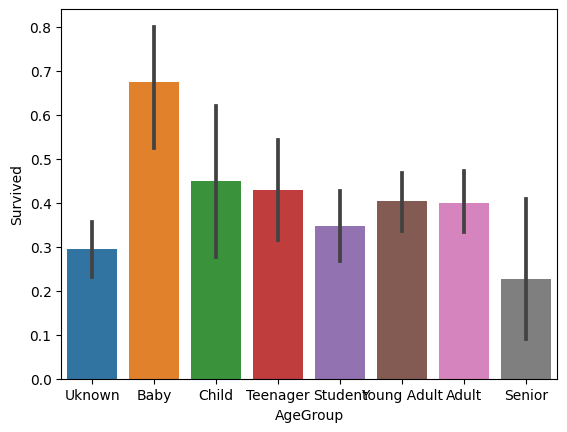

In [16]:
train['AgeGroup'] = pd.cut(train['Age'], bins, labels=labels)
test['AgeGroup'] = pd.cut(test["Age"],bins,labels=labels)

sns.barplot(x='AgeGroup',y='Survived',data=train)
plt.show()

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [19]:
train = train.drop(['Ticket','Cabin','Fare'],axis=1)
test = test.drop(['Ticket','Cabin','Fare'],axis=1)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult


Dealing with missing values

In [22]:
print("Number of people embarking in Southampton (S) : ")
southampton = train[train['Embarked'] == 'S'].shape[0]
print(southampton)
print("Number of people embarking in Cherbourg (C) : ")
cher = train[train['Embarked'] == 'C'].shape[0]
print(cher)
print("Number of people embarking in Queenstown (Q) : ")
queen = train[train['Embarked'] == 'Q'].shape[0]
print(queen)

Number of people embarking in Southampton (S) : 
644
Number of people embarking in Cherbourg (C) : 
168
Number of people embarking in Queenstown (Q) : 
77


In [24]:
train = train.fillna({'Embarked' : 'S'})

In [25]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [28]:
combine = [train,test]

In [33]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand =False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [36]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Capt','Col', 'Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [37]:
list(train[['Title','Survived']].groupby(['Title'], as_index = False).mean()['Title'])

['Master', 'Miss', 'Mr', 'Mrs', 'Rare', 'Royal']

In [38]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Royal':5, 'Rare':6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [39]:
# mode of each group for each title

In [51]:
mr_age = train[train['Title'] == 1]['AgeGroup'].mode()
miss_age = train[train['Title'] == 2]['AgeGroup'].mode()
mrs_age = train[train['Title'] == 3]['AgeGroup'].mode()
master_age = train[train['Title'] == 4]['AgeGroup'].mode()
royal_age = train[train['Title'] == 5]['AgeGroup'].mode()
rare_age = train[train['Title'] == 6]['AgeGroup'].mode()

age_title_map = {1: 'Young Adult',2: 'Student',3: 'Adult',4: 'Baby',5: 'Adult',6: 'Adult'}

for i in range(len(train['AgeGroup'])):
    if train['AgeGroup'][i] == 'Unknown':
        train['AgeGroup'][i] = age_title_map[train['Title'][i]]
        
for i in range(len(test['AgeGroup'])):
    if test['AgeGroup'][i] == 'Unknown':
        test['AgeGroup'][i] = age_title_map[test['Title'][i]]

In [52]:
train.AgeGroup.unique()

['Student', 'Adult', 'Young Adult', 'Uknown', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (8, object): ['Uknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [61]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
transform = ['Sex','AgeGroup','Embarked']

for i in transform:
    train[i] = le.fit_transform(train[i])
for i in transform:
    test[i] = le.fit_transform(test[i])

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,7,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,7,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,7,1


In [62]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,1,7,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,2,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,1,3,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,2,7,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,2,4,3


In [68]:
x_train = train.drop(['PassengerId','Name','Survived'],axis=1)
y_train = train['Survived']
x_test =test.drop(['PassengerId','Name'],axis=1)

In [69]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

preds = lr.predict(x_test)

In [70]:
preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [72]:
ids = test['PassengerId']
output = pd.DataFrame({'PassengerId': ids,'Survived' : preds})
output.to_csv('submission.csv',index=False)